## Libs

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

## DATABASE

In [2]:
data = pd.read_csv('Churn.csv', sep=';')
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
data.shape

(999, 12)

## Nomeando Colunas

In [4]:
data.columns = [
    'id', 'score', 'estado', 'genero', 'idade', 'patrimonio', 'saldo',
    'produtos', 'temcardcredito', 'ativo', 'salario', 'saiu'
]
data.tail()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,temcardcredito,ativo,salario,saiu
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


## Valores Nulos

In [25]:
data.isnull().sum()

id                0
score             0
estado            0
genero            8
idade             0
patrimonio        0
saldo             0
produtos          0
temcardcredito    0
ativo             0
salario           7
saiu              0
dtype: int64

## Agrupando e Tratando Dados
## Dados Categóricos

### Estados

In [5]:
estados = data.groupby(['estado']).size()
estados

estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='estado'>

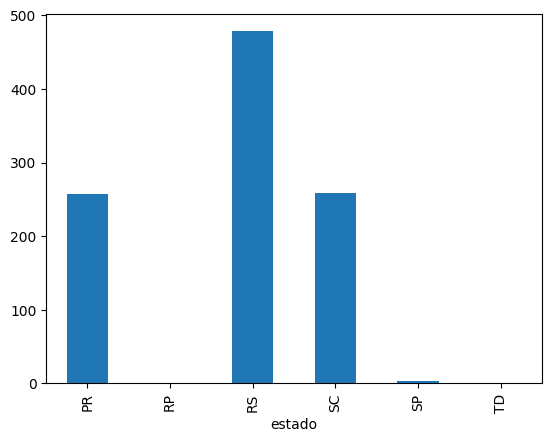

In [6]:
estados.plot.bar()

### Generos

In [7]:
generos = data.groupby(['genero']).size()
generos

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='genero'>

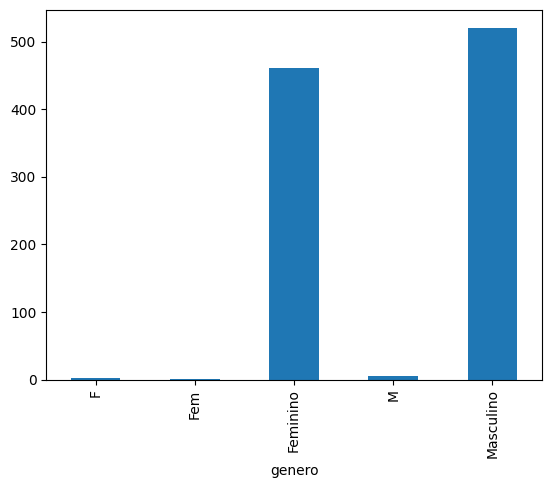

In [8]:
generos.plot.bar()

## Dados Numéricos

### Score

In [9]:
data['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Scores')

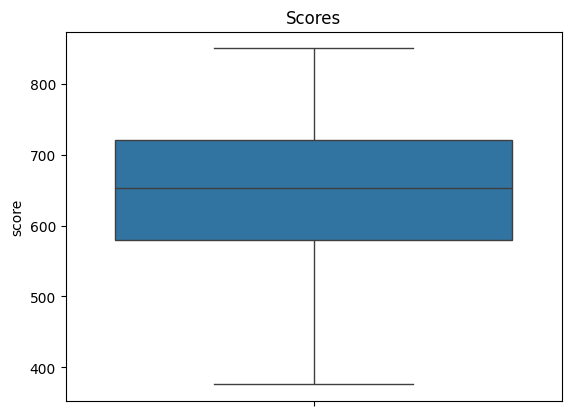

In [10]:
srn.boxplot(data['score']).set_title('Scores')

/tmp/ipykernel_5348/497657648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['score']).set_title('Scores')


Text(0.5, 1.0, 'Scores')

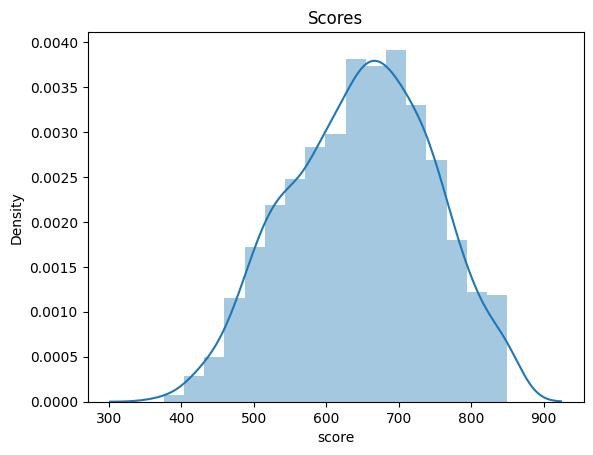

In [15]:
srn.distplot(data['score']).set_title('Scores')

### Idades

In [16]:
data['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

Text(0.5, 1.0, 'Idades')

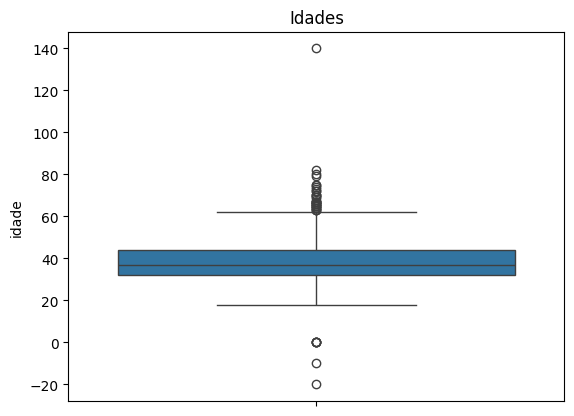

In [17]:
srn.boxplot(data['idade']).set_title('Idades')

/tmp/ipykernel_5348/4207858019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['idade']).set_title('Idades')


Text(0.5, 1.0, 'Idades')

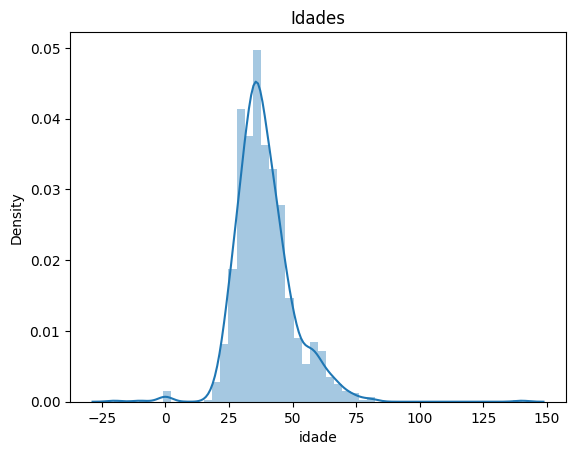

In [18]:
srn.distplot(data['idade']).set_title('Idades')

### Saldos

In [19]:
data['saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64

Text(0.5, 1.0, 'Saldos')

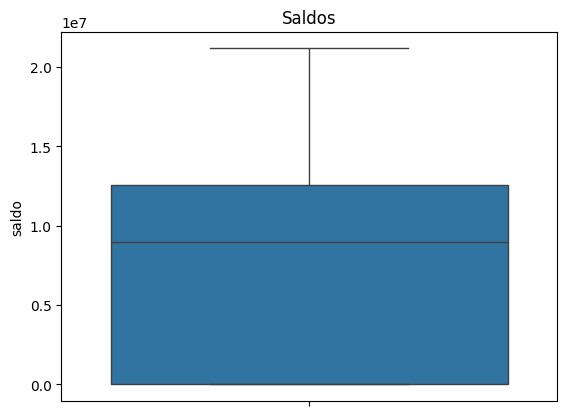

In [20]:
srn.boxplot(data['saldo']).set_title('Saldos')

/tmp/ipykernel_5348/352996391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['saldo']).set_title('Saldos')


Text(0.5, 1.0, 'Saldos')

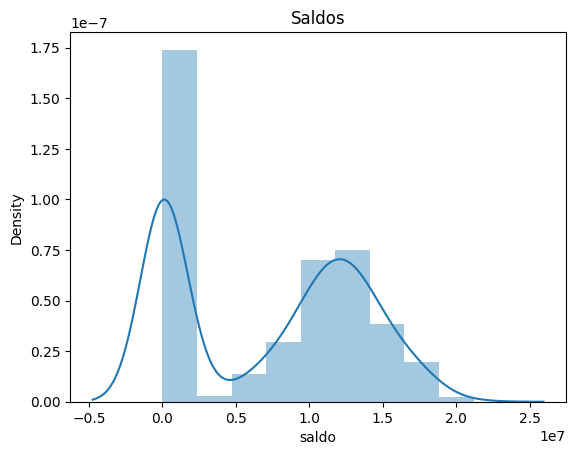

In [21]:
srn.distplot(data['saldo']).set_title('Saldos')

### Salarios

In [22]:
data['salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

Text(0.5, 1.0, 'Salarios')

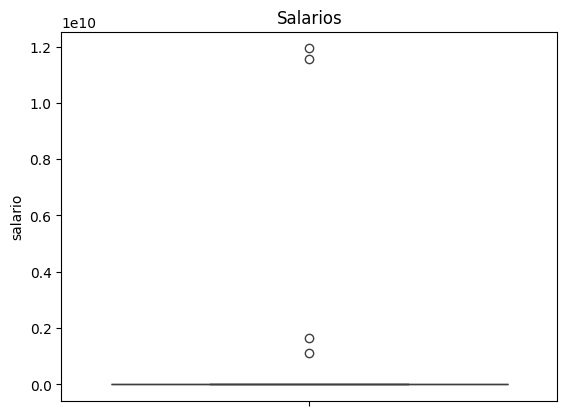

In [23]:
srn.boxplot(data['salario']).set_title('Salarios')

/tmp/ipykernel_5348/472077938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(data['salario']).set_title('Salarios')


Text(0.5, 1.0, 'Salarios')

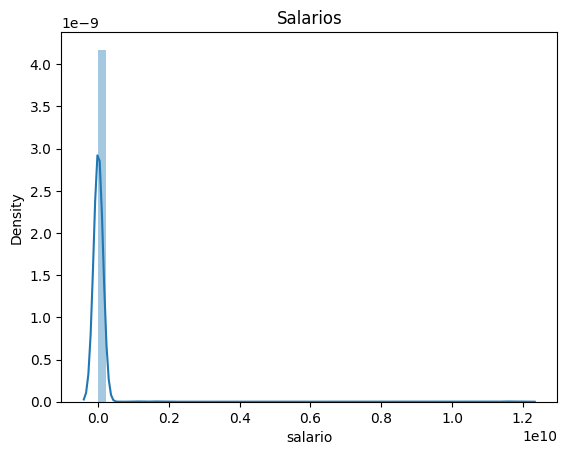

In [24]:
srn.distplot(data['salario']).set_title('Salarios')